#### Import necessary libraries

In [50]:
import pandas as pd # Pandas is a popular library for data manipulation and analysis in Python

df = pd.read_csv("./Sales_Data/Sales_April_2019.csv") # This line reads a CSV file named "Sales_April_2019.csv"

df.head() # This line displays the first five rows of the DataFrame df using the head() method.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 8:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 9:27,"333 8th St, Los Angeles, CA 90001"


#### Read all files inside a directory

In [51]:
import os # This line imports the os module, which provides a way to interact with the operating system, 
#including functions to manipulate files and directories.

files = [file for file in os.listdir("./Sales_Data")] # This line creates a list called files using a 
#list comprehension. It retrieves the names of all files and directories within the "./Sales_Data" directory 
#using os.listdir(). The list comprehension iterates through the items returned by os.listdir("./Sales_Data"), 
#adding each item (file or directory) to the files list.

for file in files: # This part of the code iterates through each item (file or directory) in the files list 
#and prints out the name of each file or directory one by one.
    print(file)

Sales_December_2019.csv
.DS_Store
Sales_April_2019.csv
Sales_February_2019.csv
Sales_March_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv


#### Task 1: Merge the 12 months of sales data into a single CSV file

In [52]:
# Reads multiple CSV files located in the "./Sales_Data" directory, each representing 
# sales data for different months, and combines them into a single DataFrame. It then 
# exports this consolidated DataFrame to a new CSV file named "all_data.csv"

import pandas as pd
import os
files = [file for file in os.listdir('./Sales_Data')]

# This line initializes an empty pandas DataFrame called all_months_data. 
# This DataFrame will be used to store the combined data from all CSV files
all_months_data = pd.DataFrame()

# The following loop iterates through each file name in the files list:
for file in files:
    # For each file, it reads the CSV data using pd.read_csv(). It specifies the 
    # file path by concatenating "./Sales_Data/" with the current file name and 
    # specifies the encoding as 'ISO-8859-1' to handle non-UTF-8 characters.
    
    df = pd.read_csv("./Sales_Data/" + file, encoding='ISO-8859-1')
    # It concatenates the data from the current file (contained in DataFrame df) 
    # with the data accumulated so far in all_months_data. This effectively combines 
    # all the data from each CSV file into a single DataFrame
    all_months_data = pd.concat([all_months_data, df])

# Finally, it exports the consolidated DataFrame all_months_data to a new CSV file 
# named "all_data.csv" with the index column omitted (index=False)
all_months_data.to_csv("all_data.csv", index=False)

#### Read in updated dataframe

In [53]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN


### Clean up the data!

#### Drop rows of NaN

In [54]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

# Selects all rows where any column contains NaN values. The axis=1 refers to the column axis or vertical axis
all_data = all_data.dropna(axis=1, how='all')
all_data = all_data.reset_index(drop=True)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### Find 'Or' and delete it

In [55]:
# Checks if the resulting slice is not equal to the string 'Or'in the column 'Order Date'
# It accesses a slice of each element in the column, and extracts the first two characters (the month MM part)
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Convert columns to the correct type

In [56]:
# It uses the pd.to_numeric() function from the pandas library to convert the data in 
# 'Quantity Ordered' and 'Price Each' columns to a numeric data type
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

#### Task 2: Add Month Column

In [59]:
# This code first extracts the month from the 'Order Date' column and stores it in the 'Month' column
all_data['Month'] = all_data['Order Date'].str.slice(0, 2)
# After populating the 'Month', replaces any NaN values in 'Month' with a placeholder value, such as '00'
all_data['Month'].fillna('00', inplace=True)
# Finally, it converts 'Month' to integers using pd.to_numeric()
all_data['Month'] = pd.to_numeric(all_data['Month'])
all_data.head()

# This approach ensures that NaN values are handled appropriately and do not cause the conversion error.

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


#### Task 3: Add a sales column

In [61]:
# This code is adding a new column called 'Sales' and populating it with the result of multiplying the values in the 
# 'Quantity Ordered' column by the values in the 'Price Each' column
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


#### Task 3: Add city column

In [64]:
# The following functions, get_city() and get_state(), are defined to extract the city and state information from the 'Purchase Address' column.
# and then using these functions to populate a new 'City' column

# The get_city() function simply splits the address string at the first comma (',') and returns the second element, which is assumed to be the city name.
# if the address is NaN, the function returns None instead of attempting to split it.
def get_city(address):
    if not pd.isna(address):
        return address.split(',')[1]
    else:
        return None

# The get_state() function, on the other hand, splits the address string at the second comma (',') and then splits the resulting string by spaces (' ') 
# to extract the second word, which is assumed to be the state abbreviation.
# if the address is NaN, the function returns None instead of attempting to split it
def get_state(address):
    if not pd.isna(address):
    # this line splits the address string using a comma (',') as the separator, selects the third part of the resulting split (index 2), and 
    # then splits it again using a space (' ') as the separator and returns the second part of that split (index 1).
    # In an address like "123 Main St, Los Angeles, CA" and returns "CA."
        return address.split(',')[2].split(' ')[1]
    else:
        return None

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

# Drop is used to Delete column with name 'Column'
# all_data = all_data.drop(columns = 'Column', inplace=True) 

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1.0,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1.0,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1.0,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1.0,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1.0,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


#### Question 1: What was the best month for sales? how much was earned that month?

In [71]:
# This code groups the DataFrame all_data by the values in the 'Month' column, then calculates the sum of all the numeric columns within each group.
results = all_data.groupby('Month').sum()
display(results)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City
Month,,,,,,,,
0,0,0,0.0,0.00,0,0,0.00,None (None)None (None)None (None)None (None)No...
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903.0,1811768.38,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",1822256.73,Dallas (TX) New York City (NY) New York City ...
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449.0,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",2202022.42,Portland (ME) San Francisco (CA) New York Cit...
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005.0,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",2807100.38,San Francisco (CA) Portland (OR) San Francisc...
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558.0,3367671.02,04/19/19 8:4604/07/19 22:3004/12/19 14:3804/12...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",3390670.24,Dallas (TX) Boston (MA) Los Angeles (CA) Los ...
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667.0,3135125.13,05/01/19 3:2905/01/19 0:1305/01/19 0:4805/01/1...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",3152606.75,Portland (OR) San Francisco (CA) Boston (MA) ...
6,1957481958691960721961321966381966391976981990...,27in FHD MonitorAAA Batteries (4-pack)Lightnin...,15253.0,2562025.61,06/01/19 03:2606/01/19 01:0606/01/19 00:1806/0...,"856 Elm St, San Francisco, CA 94016877 Center ...",2577802.26,San Francisco (CA) Dallas (TX) San Francisco ...
7,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072.0,2632539.56,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",2647775.76,Atlanta (GA) Seattle (WA) Atlanta (GA) Atlant...
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448.0,2230345.42,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",2244467.88,Seattle (WA) Dallas (TX) Portland (OR) Los An...


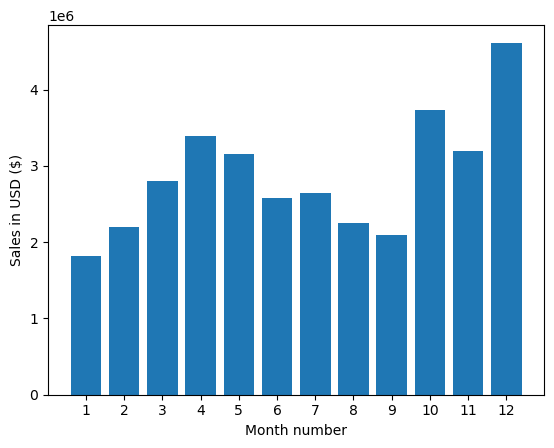

In [79]:
# This code is using the Matplotlib library to create and display a bar chart that visualizes the monthly sales data
import matplotlib.pyplot as plt

# defines a range of numbers from 1 to 12 (months)
months = range(1,13)

# Removes the 0th element from the 'results['Sales']' array which contains nothing
sliced_sales_data = results['Sales'][1:]

plt.bar(months, sliced_sales_data)
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### Question 2: What city had the highest number of sales?

In [49]:
# This code groups the DataFrame all_data by the values in the 'City' column, then calculates the sum of all the numeric columns within each group.
results = all_data.groupby('City').sum()
results

KeyError: 'City'

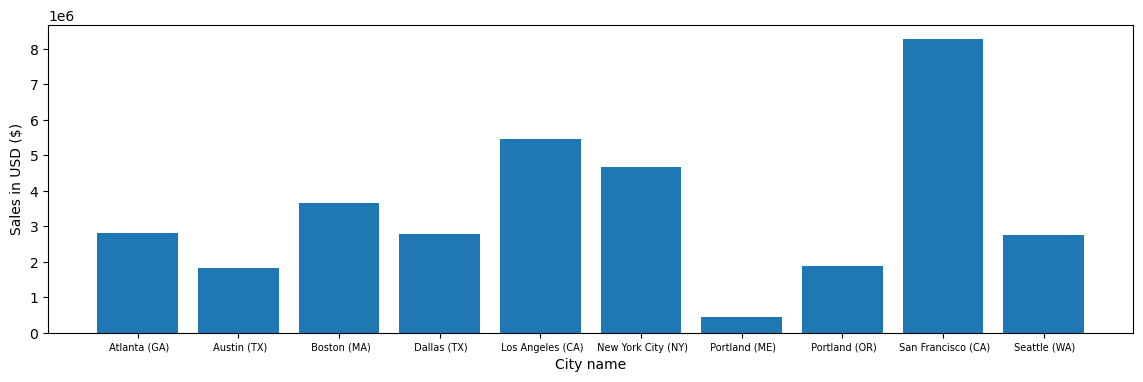

In [38]:
# This code is creating a bar chart to visualize the sales data for different cities.
import matplotlib.pyplot as plt

# Set the figure size (adjust width and height as needed)
plt.figure(figsize=(14, 4))

# This line uses a list comprehension to extract the unique city names from the 'City' column by grouping the data 
# using .groupby('City'). It creates a list of city names.
cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation = 'horizontal', size = 7)
plt.ylabel('Sales in USD ($)', size=10)
plt.xlabel('City name', size=10)
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [39]:
# This code is converting the 'Order Date' column in the all_data to a datetime data type using pd.to_datetime().
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY)
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY)
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY)
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA)
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA)


In [43]:
# This code is adding two new columns to the all_data DataFrame, 'Hour' and 'Minute,' and populating them with 
# the hour and minute components of the 'Order Date' column, respectively
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


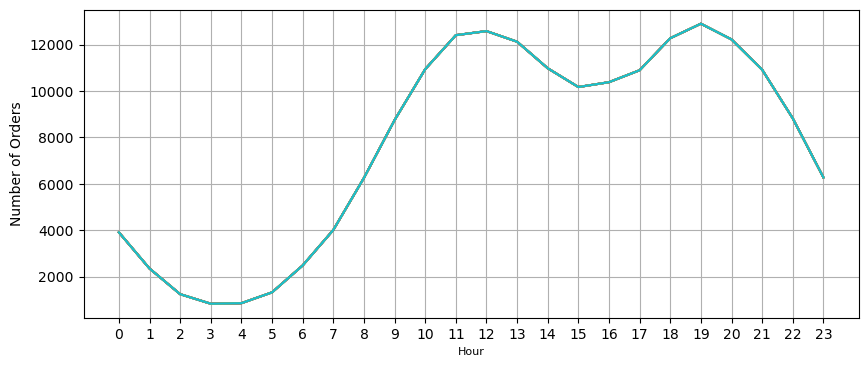

In [49]:
# This code is creating a line plot that visualizes the number of orders for each hour of the day

# This line uses a list comprehension to extract unique hour values from the 'Hour' column in the all_data by grouping the 
# data using .groupby('Hour'). It creates a list of hours.
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.figure(figsize=(10, 4))

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

# My recommendation is around 11am (11) or 7pm (19)

#### Question 4: What products are most often sold together?

In [50]:
#  This code is creating a new DataFrame df that contains only the rows from the all_data DataFrame where the 'Order ID' is duplicated.

# The .duplicated() method is used to create a boolean Series that checks for duplicate values in the 'Order ID' column.
# The argument keep=False means that all occurrences of the duplicated values will be marked as True, including the first occurrence.
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df.head(15)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston (MA),12,37
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston (MA),12,37
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston (MA),12,37
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston (MA),12,37
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City (NY),14,32
37,295698,USB-C Charging Cable,2,11.95,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,23.90,New York City (NY),14,32
42,295703,AA Batteries (4-pack),1,3.84,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,3.84,Austin (TX),12,27
43,295703,Bose SoundSport Headphones,1,99.99,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,99.99,Austin (TX),12,27
66,295726,iPhone,1,700.00,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,700.00,Boston (MA),14,49
67,295726,Lightning Charging Cable,1,14.95,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,14.95,Boston (MA),14,49


In [51]:
# This code is performing data manipulation to group and aggregate products associated with the same 'Order ID' in the DataFrame 'df' 
# and create a new DataFrame with two columns: 'Order ID' and 'Grouped' containing the grouped product information.

df = all_data[all_data['Order ID'].duplicated(keep=False)].copy()

# This line groups the rows in the DataFrame 'df' by the 'Order ID' and then for each group, it aggregates 
# the 'Product' column values into a single string, joined by commas. The result of this operation is assigned to a new column 'Grouped'
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# This line selects only the 'Order ID' and 'Grouped' columns, then uses the drop_duplicates() method to remove 
# any duplicate rows based on the 'Order ID' column
df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [52]:
# This code is using the itertools and collections modules to count combinations of pairs of products that frequently appear together in customer orders.
# Reference: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

# The combinations function is used to generate all possible pairs of items from a list
from itertools import combinations

# The Counter class is used for counting the occurrences of elements in an iterable
from collections import Counter

# This line initializes an empty Counter object named to keep track of the frequency of pairs of products
count = Counter()

# This line iterates through each row in the 'Grouped' column of the DataFrame df
for row in df['Grouped']:

    # Inside the loop, this line splits the 'row' into a list of individual products by using the comma (',') as the separator
    row_list = row.split(',')

    # This line generates all possible combinations of pairs (2 items) from the 'row_list' using the combinations function
    # The Counter constructor is used to count the occurrences of these pairs, and the result is then added to the 'count' object
    count.update(Counter(combinations(row_list, 2)))
    
print(count)
# it will print the most items commonly ordered together (2 products). 
# In this case, ('iPhone', 'Lightning Charging Cable'): 1005 are the most items commonly ordered together

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [53]:
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [54]:
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Question 5: What product sold the most? Why do you think it sold the most?

In [55]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City (NY),0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City (NY),7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City (NY),18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco (CA),15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta (GA),12,38


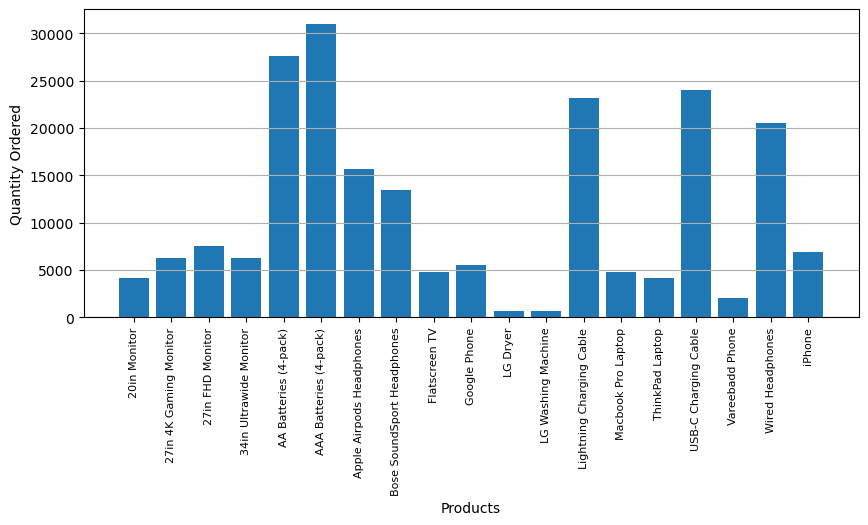

In [59]:
# This code is creating a bar chart to visualize the quantity of each product that has been ordered in the all_data DataFrame

# This line groups by the 'Product' column. Then, It drops the 'Order Date' column first and then groups the data based on the remaining columns. 
# This is done to focus on the 'Product' column and calculate the total quantity ordered for each product
product_group = all_data.drop(columns=['Order Date']).groupby('Product')

# This line calculates the sum of the 'Quantity Ordered' for each product group
quantity_ordered = product_group.sum()['Quantity Ordered']

# This line extracts the unique product names (product labels) from the product groups created earlier and stores them in a list called 'products.'
products = [product for product, df in product_group]

plt.figure(figsize=(10, 4))

plt.bar(products, quantity_ordered)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.xticks(products, rotation='vertical', size=8)
plt.grid(axis='y', zorder=0)
plt.show()

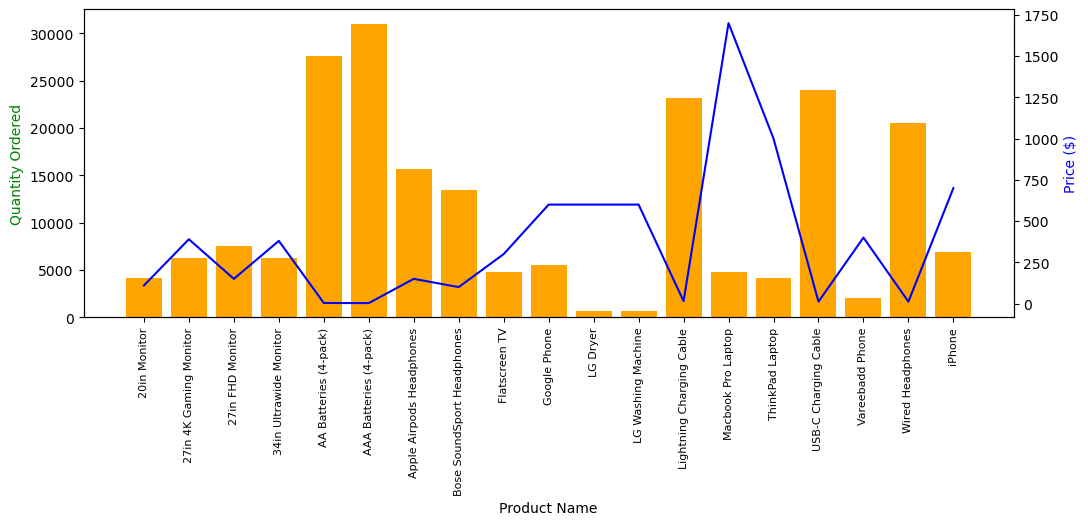

In [63]:
# This code creates a plot that combines a bar chart and a line plot to visualize both the quantity ordered and the price for each product

# This line groups the DataFrame 'all_data' by the 'Product' column and calculates the mean price for each product. 
prices = all_data.drop(columns=['Purchase Address', 'City']).groupby('Product').mean()['Price Each']

# This line creates a figure and two axes, ax1 and ax2, which will allow for dual-axis plotting.
fig, ax1 = plt.subplots(figsize=(12, 4))  # Adjust the width and height as needed

# This line creates a second y-axis (ax2) that shares the same x-axis (ax1). This allows for two different y-axes on the same plot.
ax2 = ax1.twinx()

ax1.bar(products, quantity_ordered, color='orange')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

ax1.set_xticks(range(len(products)))
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()